In [23]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Train a DNN on MNIST

In [24]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [25]:
from mnist_model import data, plot, model

## Load the data

In [56]:
train_img, train_lab, val_data = data.mnist_train_kaggle(
                                    '../data/train.csv')

input_size = (784,)
img_size = (28,28,1)

print("Training examples: ", len(train_img))
print("Validataion examples: ", len(val_data[0]))

Training examples:  37800
Validataion examples:  4200


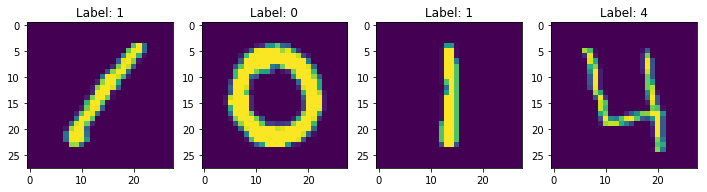

In [57]:
plot.plot_some(train_img, data.classes(train_lab))

In [59]:
import numpy as np
print('Min:', np.min(train_img), ' Max:', np.max(train_img), 'Mean:', np.mean(train_img), 'Std:', np.std(train_img))

Min: -0.8508020140306122  Max: 7.621206476768555 Mean: -2.8556744007116864e-17 Std: 1.0000000000000004


# Construct the model

In [60]:
network = model.MNIST_model(epochs=20)
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
__________

# Train the model

In [ ]:
network.train(x=train_img,
          y=train_lab,
          val_data=val_data,
          log_dir='../logs/')

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 4s 104us/step - loss: 0.2130 - acc: 0.9380 - val_loss: 0.1018 - val_acc: 0.9690
Epoch 2/20
35840/37800 [===========================>..] - ETA: 0s - loss: 0.0529 - acc: 0.9837

# Run the model

Accuracy:  98.64285714285714 %


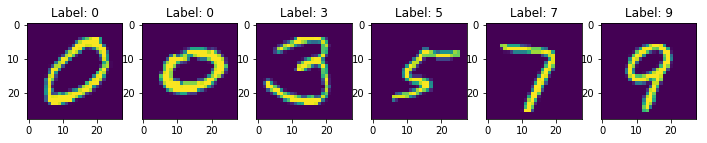

In [45]:
p = data.classes(network.model.predict(val_data[0]))
accuracy = sum(p == data.classes(val_data[1])) / len(val_data[1])
print('Accuracy: ', accuracy*100, '%')
plot.plot_some(val_data[0], p, 6)

# Save the model

In [8]:
network.save('../models/')